### Student Information
Name: 黃子洋

Student ID: 110021131

GitHub ID: Matt-1212

Kaggle name: Matthuang1212

Kaggle private scoreboard snapshot:

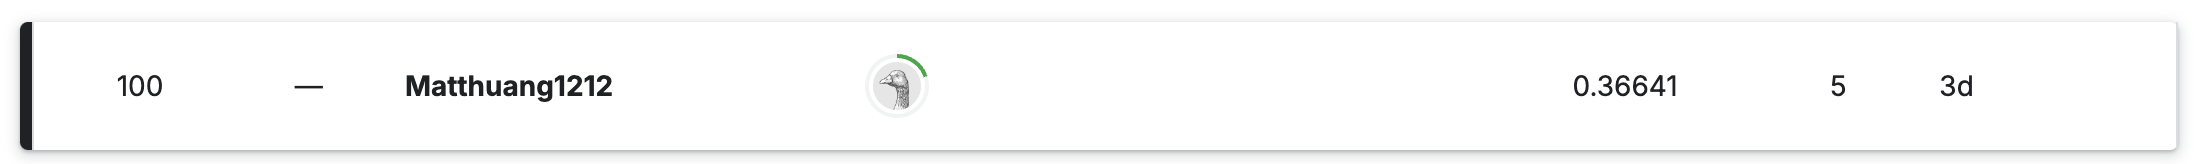

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

In [ ]:
### Begin Assignment Here

In [ ]:
pip install numpy pandas 

In [3]:
import numpy as np
import pandas as pd

emotion = pd.read_csv('/home/tzuyang2024/emotion.csv')
identify = pd.read_csv('/home/tzuyang2024/data_identification.csv')

In [3]:
with open('/home/tzuyang2024/tweets_DM.json', 'r', encoding='utf-8') as infile:
    # 讀取所有行並儲存
    lines = infile.readlines()
    
    for i, line in enumerate(lines[-5:], start=1):  
        print(f"第 {len(lines)-5+i} 行原始資料：{line.strip()}")

第 1867531 行原始資料：{"_score": 827, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": ["mixedfeeling", "butimTHATperson"], "tweet_id": "0x316b80", "text": "When you buy the last 2 tickets remaining for a show and sell it out.. #mixedfeeling <LH> #butimTHATperson"}}, "_crawldate": "2015-05-12 12:51:52", "_type": "tweets"}
第 1867532 行原始資料：{"_score": 368, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": [], "tweet_id": "0x29d0cb", "text": "I swear all this hard work gone pay off one day\ud83d\ude08\ud83d\udcb0\ud83d\udcb8 <LH>"}}, "_crawldate": "2017-10-02 17:54:04", "_type": "tweets"}
第 1867533 行原始資料：{"_score": 498, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": [], "tweet_id": "0x2a6a4f", "text": "@Parcel2Go no card left when I wasn't in so I have no idea how to get my parcel <LH>"}}, "_crawldate": "2016-10-10 11:04:32", "_type": "tweets"}
第 1867534 行原始資料：{"_score": 840, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": [], "tweet_id": "0x

In [4]:
import json
import re

# 修正函數：將不正確的格式修正為正確的 JSON 格式
def fix_json_format(line):
    # 去除尾端多餘的逗號
    line = re.sub(r',\s*$', '', line)
    # 補充缺失的大括號（檢查結尾是否缺少大括號）
    if not line.endswith('}'):
        line += '}'
    return line

# 儲存解析後的資料
raw_tweets = []

# 打開檔案並逐行讀取
with open('/home/tzuyang2024/tweets_DM.json', 'r', encoding='utf-8') as infile:
    for i, line in enumerate(infile, start=1):
        if i == 994096:  # 只處理第 994096 行
            print(f"第 {i} 行原始資料：{line.strip()}")  
            fixed_line = fix_json_format(line.strip())  # 修正該行格式
            try:
                # 嘗試解析修正後的資料
                parsed_line = json.loads(fixed_line)
                raw_tweets.append(parsed_line)
                print(f"第 {i} 行已修正並成功解析。")
            except json.JSONDecodeError as e:
                print(f"修正後第 {i} 行仍無法解析：{e}")
        else:
            try:
                # 其他行直接解析
                parsed_line = json.loads(line.strip())
                raw_tweets.append(parsed_line)
            except json.JSONDecodeError as e:
                print(f"第 {i} 行解析錯誤：{e}")

# 儲存解析後的資料
with open('/home/tzuyang2024/文件/parsed_tweets.json', 'w', encoding='utf-8') as outfile:
    json.dump(raw_tweets, outfile, indent=4, ensure_ascii=False)

print("資料處理完成！")

第 994096 行原始資料：{"_score": 686, "_index": "hashtag_tweets", "_source": {"tweet": {"hashtags": [], "tweet_id": "0x2774e9", "text": "@Maebe_A_Girl @JOHNFENOGLIO If it was you, I'm totally following <LH>"}}, "_crawldate": "2016-10-09 05:00:22", "_type": "tweets"}
第 994096 行已修正並成功解析。
資料處理完成！


In [5]:
tweets_data = [
    {'tweet_id': tweet['_source']['tweet']['tweet_id'], 'text': tweet['_source']['tweet']['text']}
    for tweet in raw_tweets
]
tweets_df = pd.DataFrame(tweets_data)

train_ids = identify[identify['identification'] == 'train']
train_tweets = train_ids.merge(tweets_df, on='tweet_id', how='inner')

train_data = train_tweets.merge(emotion, on='tweet_id', how='left')

train_data = train_data[['tweet_id', 'text', 'identification', 'emotion']]

print(train_data.head())

   tweet_id                                               text identification  \
0  0x29e452  Huge Respect🖒 @JohnnyVegasReal talking about l...          train   
1  0x2b3819  Yoooo we hit all our monthly goals with the ne...          train   
2  0x2a2acc  @KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...          train   
3  0x2a8830  Come join @ambushman27 on #PUBG while he striv...          train   
4  0x20b21d  @fanshixieen2014 Blessings!My #strength little...          train   

        emotion  
0           joy  
1           joy  
2         trust  
3           joy  
4  anticipation  


In [6]:
test_ids = identify[identify['identification'] == 'test']
test_tweets = test_ids.merge(tweets_df, on='tweet_id', how='inner')

test_data = test_tweets.merge(emotion, on='tweet_id', how='left')

test_data = test_data[['tweet_id', 'text', 'identification']]

print(test_data.head())

   tweet_id                                               text identification
0  0x28cc61  @Habbo I've seen two separate colours of the e...           test
1  0x2db41f  @FoxNews @KellyannePolls No serious self respe...           test
2  0x2466f6  Looking for a new car, and it says 1 lady owne...           test
3  0x23f9e9  @cineworld “only the brave” just out and fount...           test
4  0x1fb4e1  Felt like total dog 💩 going into open gym and ...           test


In [7]:
pip install transformers scikit-learn torch tf-keras tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 向量化文本，使用 n-grams
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(train_data['text'])
y = train_data['emotion']

# 平衡數據分佈
smote = SMOTE(random_state=1212)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 訓練 Naive Bayes 模型
model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

# 驗證並評估
y_val_pred = model.predict(X_val)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation Macro F1-Score: {macro_f1:.2%}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Macro F1-Score: 46.26%
Classification Report:
               precision    recall  f1-score   support

       anger       0.51      0.49      0.50    103265
anticipation       0.54      0.52      0.53    103352
     disgust       0.37      0.52      0.43    102778
        fear       0.49      0.60      0.54    103113
         joy       0.45      0.37      0.41    103482
     sadness       0.46      0.34      0.39    103680
    surprise       0.48      0.42      0.45    103183
       trust       0.45      0.45      0.45    102775

    accuracy                           0.46    825628
   macro avg       0.47      0.46      0.46    825628
weighted avg       0.47      0.46      0.46    825628



In [12]:
X_test = vectorizer.transform(test_data['text'])

test_data['predicted_emotion'] = model.predict(X_test)

submission = test_data[['tweet_id', 'predicted_emotion']].rename(columns={'tweet_id': 'id', 'predicted_emotion': 'emotion'})

submission.to_csv('sampleSubmission.csv', index=False, encoding='utf-8')

print("成功儲存：sampleSubmission.csv")


測試集結果已成功儲存：sampleSubmission.csv


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from tqdm import tqdm

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(train_data['text'])
y = train_data['emotion']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#訓練 Naive Bayes 模型
model = MultinomialNB()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation Macro F1-Score: {macro_f1:.2%}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

X_test = vectorizer.transform(test_data['text'])
test_data['predicted_emotion'] = model.predict(X_test)

submission = test_data[['tweet_id', 'predicted_emotion']].rename(columns={'tweet_id': 'id', 'predicted_emotion': 'emotion'})
submission.to_csv('sampleSubmission4.csv', index=False, encoding='utf-8')

print("已儲存：sampleSubmission4.csv")


Validation Macro F1-Score: 39.03%
Classification Report:
               precision    recall  f1-score   support

       anger       0.77      0.14      0.24      7964
anticipation       0.63      0.45      0.52     49725
     disgust       0.49      0.32      0.38     27892
        fear       0.80      0.27      0.41     12955
         joy       0.48      0.87      0.62    103089
     sadness       0.51      0.40      0.45     38835
    surprise       0.78      0.12      0.21      9750
       trust       0.62      0.19      0.29     40903

    accuracy                           0.52    291113
   macro avg       0.64      0.35      0.39    291113
weighted avg       0.56      0.52      0.48    291113

提交檔案已儲存：sampleSubmission4.csv


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(train_data['text'])
y = train_data['emotion']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=1212)

n_epochs = 1  
with tqdm(total=n_epochs, desc="訓練進度") as pbar:
    for epoch in range(n_epochs):
        model.fit(X_train, y_train)
        pbar.update(1)

y_val_pred = model.predict(X_val)

val_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation Macro F1-Score: {val_f1:.2%}")

print("Classification Report:")
print(classification_report(y_val, y_val_pred))

X_test = vectorizer.transform(test_data['text'])
test_data['predicted_emotion'] = model.predict(X_test)
submission = test_data[['tweet_id', 'predicted_emotion']].rename(columns={'tweet_id': 'id', 'predicted_emotion': 'emotion'})
submission.to_csv('sampleSubmission_decision_tree.csv', index=False, encoding='utf-8')
print("成功儲存：sampleSubmission_decision_tree.csv")

訓練進度: 100%|██████████| 1/1 [46:51<00:00, 2811.17s/it]


Validation Macro F1-Score: 38.37%
Classification Report:
              precision    recall  f1-score   support

       anger       0.30      0.22      0.25      7973
anticipation       0.50      0.50      0.50     49787
     disgust       0.33      0.31      0.32     27820
        fear       0.40      0.35      0.37     12800
         joy       0.55      0.63      0.59    103204
     sadness       0.41      0.39      0.40     38687
    surprise       0.32      0.23      0.26      9746
       trust       0.39      0.35      0.37     41096

    accuracy                           0.47    291113
   macro avg       0.40      0.37      0.38    291113
weighted avg       0.46      0.47      0.46    291113

測試集結果已成功儲存：sampleSubmission_decision_tree.csv


In [10]:
submission['emotion'].unique()

array(['joy', 'sadness', 'anticipation', 'trust', 'surprise', 'fear',
       'disgust', 'anger'], dtype=object)